# Review and additional content PCA + more
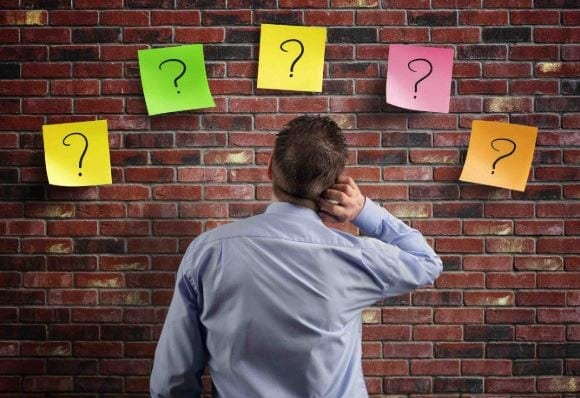

### Data Exploration and Cleaning with Python
1) Review of basic Python
2) Importing Data 
3) Basic Exploration
4) Intro to Cleaning Data
5) Missing Data Techniques
6) Dimensionality Reduction


## Review of basic Python

We will start by taking a look at a new file boardgame data from boardgamegeek.com
Finding or creating your own metadata is a extremely helpful in making the rest of the process move smoothly.

index - numbered index
- objectid - the identifier on boardgamegeeks.com
- name - name of the game
- yearpublished - the year the game was published
- sortindex - rank of the game on bbg.com
- minplayer - minumum number of players per the publishers
- maxplayers - maximum number of players per the publishers
- minplaytime - minimum playtime required per the publishers
- maxplaytime - maximum playtime per the publishers
- minage - minimum age requiremnet per the publishers
- min_community - minimum players per the community
- max_community - max players per the community
- totalvotes - total number of community vote
- playerage - minimum age requirement per the community
- languagedependence - a rank of amount of in-game text is required during game play
        '(no votes)':0,
        'Extensive use of text - massive conversion needed to be playable':4,
        'Moderate in-game text - needs crib sheet or paste ups':3,
        'No necessary in-game text':1,
        'Some necessary text - easily memorized or small crib sheet':2,
        'Unplayable in another language':5

- userrated - number of users that have rated the game
- average - user average rating from 1-10
- baverage - from the site, determined to be an anti-skewing effort by bgg  with system added mid range ratings (from 1-10)
- stddev - average standard deviation of a rating
- avgweight - a complexity rating from 1-5 Weight
- numweights - number of weight votes
- numgeeklists - number of geeks with game on list
- numtrading - number of people trading the game
- numwanting - number of people wanting the game
- numcomments - number of comments on the site on this game
- siteviews - number of views on the site
- numplays - number of times game was played (according to site users?)
- numplays_month - number of plays per month
- news - number news articles on game
- blogs - number of blogs regarding game
- weblink - number of weblinks for the game
- podcast - number of podcasts on the game
- label - category of game (mostly boardgame)
- boardgamedesigner_cnt - count of designers
- boardgameartist_cnt - artist count
- boardgamepublisher_cnt - publisher count
- boardgamehonor_cnt - awards count
- boardgamecategory_cnt - category count
- boardgamemechanic_cnt - game mechanics count
- boardgameexpansion_cnt - expansion count
- boardgameversion_cnt - version count (languages)
- boardgamefamily_cnt - game family count
- boardgamedesigner - list of game designers
- boardgameartist - list of game artists
- boardgamepublisher - list of publishers
- boardgamehonor - list of awards
- boardgamecategory - list of categories
- boardgameversion - list of versions
- boardgamemechanic - a list of mechanics
- boardgameexpansion - a list of expansions
- boardgamefamily - a list of boardgames family
- description - full text description of game
- gamelink - a link to the game on bgg

In [1]:
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.cluster import KMeans


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
import pandas as pd
# LOAD A FILE 
df = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//bggdata.csv')
df

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,...,"['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",Brass: Birmingham is an economic strategy game...,/boardgame/224517/brass-birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5154,Franchise,1990,19996,2,8,90,90,0,NaN,...,['(Uncredited)'],['Herrin & Kramer'],['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']","['Simulation', 'Trading']",['None'],['Sports: Baseball'],The goal of Franchise is to accumulate the mos...,/boardgame/5154/franchise
19996,5158,Punto y Raya,1988,19997,2,2,20,20,0,NaN,...,['(Uncredited)'],['CEFA (Celulosa Fabril S. A.)'],['None'],['Abstract Strategy'],['Enclosure'],['Enclosure'],['None'],['Dots and Boxes'],Punto y Raya translates as &amp;quot;Point and...,/boardgame/5158/punto-y-raya
19997,5159,3 Up,1972,19998,2,4,20,20,5,NaN,...,['(Uncredited)'],"['Airfix', 'Lakeside', 'Wexler and Sons']",['None'],"['Abstract Strategy', 'Childrens Game']","['Airfix edition', 'Lakeside edition', 'Wexler...",['Pattern Building'],['None'],"['Airfix edition', 'Lakeside edition', 'Wexler...",The players alternate placing their six discs ...,/boardgame/5159/3
19998,5160,Dino-Checkers,1989,19999,2,2,30,30,6,NaN,...,['(Uncredited)'],"['Bright Child Toys', 'Educatio

In [3]:
type(df) # DataFrame

pandas.core.frame.DataFrame

In [4]:
df.head() # print the first 5 rows

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,...,"['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",Brass: Birmingham is an economic strategy game...,/boardgame/224517/brass-birmingham


In [5]:
df.head(10) # print the first 10 rows

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,...,"['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",Brass: Birmingham is an economic strategy game...,/boardgame/224517/brass-birmingham
5,233078,Twilight Imperium (Fourth Edition),2017,6,3,6,240,480,14,6.0,...,['Scott Schomburg'],"['Fantasy Flight Games', 'ADC Blackfire Entert...",['2017 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Economic', 'Negotiation', 'P...","['Chinese edition', 'Czech edition', 'English ...","['Action Drafting', 'Area Majority / Influence...",['None'],"['4X games', 'Components: Miniatures', 'Twilig...",Twilight Imperium (Fourth Edition) is a game o...,/boardgame/233078/twilight-imperium-fourth-edi...
6,12333,Twilight Struggle,2005,7,2,2,120,180,13,2.0,...,"['Viktor Csete', 'Rodger B. MacGowan', 'Chechu...","['GMT Games', '(Self-Published)', 'Asterion Pr...",['2005 Charles S. Roberts Best Modern Era Boar...,"['Modern Warfare', 'Political', 'Wargame']","['Bard Centrum Gier Polish deluxe edition', 'B...","['Action/Event', 'Advantage Token', 'Area Majo...",['Twilight Struggle: Anni di Piombo Promo Card...,"['Cold War', 'Country: Soviet Union', 'Country...","&amp;quot;Now the trumpet summons us again, no...",/boardgame/12333/twilight-struggle
7,187645,Star Wars Rebellion,2016,8,2,4,180,240,14,2.0

In [6]:
df.tail() # print the last 5 rows

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
19995,5154,Franchise,1990,19996,2,8,90,90,0,NaN,...,['(Uncredited)'],['Herrin & Kramer'],['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']","['Simulation', 'Trading']",['None'],['Sports: Baseball'],The goal of Franchise is to accumulate the mos...,/boardgame/5154/franchise
19996,5158,Punto y Raya,1988,19997,2,2,20,20,0,NaN,...,['(Uncredited)'],['CEFA (Celulosa Fabril S. A.)'],['None'],['Abstract Strategy'],['Enclosure'],['Enclosure'],['None'],['Dots and Boxes'],Punto y Raya translates as &amp;quot;Point and...,/boardgame/5158/punto-y-raya
19997,5159,3 Up,1972,19998,2,4,20,20,5,NaN,...,['(Uncredited)'],"['Airfix', 'Lakeside', 'Wexler and Sons']",['None'],"['Abstract Strategy', 'Childrens Game']","['Airfix edition', 'Lakeside edition', 'Wexler...",['Pattern Building'],['None'],"['Airfix edition', 'Lakeside edition', 'Wexler...",The players alternate placing their six discs ...,/boardgame/5159/3
19998,5160,Dino-Checkers,1989,19999,2,2,30,30,6,NaN,...,['(Uncredited)'],"['Bright Child Toys', 'Educational Insights']",['None'],"['Abstract Strategy', 'Childrens Game']",['Educational insights edition'],['Area Majority / Influence'],['None'],['Animals: Dinosaurs'],Played as the classic Checkers except there ar...,/boardgame/5160/dino-checkers
19999,5163,Obsession,1988,20000,2,2,20,20,0,2.0,...,['Martin Klinger'],['Playtoy Industries'],['None'],['Abstract Strategy'],['First edition'],"['Dice Rolling', 'Pattern Building']",['None'],['First edition'],This is essentially 3D Nine Men's Morris with ...,/boardgame/5163/obsession


In [7]:
df.index # "the index" (aka "the labels")

RangeIndex(start=0, stop=20000, step=1)

In [8]:
df.columns # column names (which is "an index")

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

In [9]:
df.dtypes # data types of each column

objectid                    int64
name                       object
yearpublished               int64
sortindex                   int64
minplayers                  int64
maxplayers                  int64
minplaytime                 int64
maxplaytime                 int64
minage                      int64
min_community             float64
max_community             float64
totalvotes                  int64
playerage                  object
languagedependence          int64
usersrated                  int64
average                   float64
baverage                  float64
stddev                    float64
avgweight                 float64
numweights                  int64
numgeeklists                int64
numtrading                  int64
numwanting                  int64
numcomments                 int64
siteviews                   int64
numplays                    int64
numplays_month              int64
news                        int64
blogs                       int64
weblink       

In [10]:
df.shape # number of rows and columns

(20000, 52)

In [11]:
df_votes = df[df.totalvotes >=1000]

In [12]:
df_votes.shape

(13, 52)

In [13]:
df_votes.values # underlying numpy array

array([[167791, 'Terraforming Mars', 2016, 3, 1, 5, 120, 120, 12, 3.0,
        4.0, 1252, '12', 3, 48339, 8.42299, 8.26781, 1.36938, 3.2313,
        1863, 5941, 277, 2068, 7274, 4724387, 245997, 4380, 14, 1158, 60,
        148, 'Board Game', 1, 1, 20, 20, 6, 9, 15, 29, 6,
        '[\'Jacob Fryxelius"\']', "['Isaac Fryxelius']",
        "['FryxGames', 'Arclight', 'Fantasmagoria', 'Ghenos Games', 'Intrafin Games', 'Kilogames']",
        "['2016 Cardboard Republic Architect Laurel Nominee', '2016 Cardboard Republic Architect Laurel Winner', '2016 Golden Geek Best Solo Board Game Nominee', '2016 Golden Geek Best Strategy Board Game Nominee', '2016 Golden Geek Board Game of the Year Nominee', '2016 Swiss Gamers Award Nominee']",
        "['Economic', 'Environmental', 'Industry / Manufacturing', 'Science Fiction', 'Space Exploration', 'Territory Building']",
        "['Bulgarian edition', 'Chinese edition', 'Czech edition', 'Danish edition', 'Dutch edition', 'English first edition']",
      

In [14]:
df_votes['totalvotes'].mean()

1370.923076923077

In [15]:
df_votes['totalvotes'].median()


1380.0

In [16]:
df_votes['totalvotes'].min()


1004

In [17]:
df_votes['totalvotes'].max()


1868

In [18]:
df_votes['totalvotes'].std()

324.20195905702093

In [19]:
df_votes.describe()

,objectid,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,...,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,41462.846154,2005.923077,116.307692,1.846154,5.307692,60.384615,110.769231,11.230769,3.307692,4.923077,...,80.846154,1.076923,5.076923,21.153846,20.307692,3.307692,7.076923,28.846154,43.769231,3.769231
std,50471.436252,5.693001,133.358780,0.688737,1.493576,38.754652,71.555519,2.127355,1.109400,1.255756,...,30.375007,0.277350,4.152540,10.573916,14.556697,1.652504,2.431102,30.964620,28.493139,2.006400
min,13.000000,1995.000000,3.000000,1.000000,4.000000,20.000000,30.000000,7.000000,1.000000,3.000000,...,16.000000,1.000000,1.000000,8.000000,2.000000,1.000000,3.000000,1.000000,9.000000,1.000000
25%,2651.000000,2002.000000,24.000000,1.000000,4.000000,30.000000,45.000000,10.000000,3.000000,4.000000,...,67.000000,1.000000,2.000000,13.000000,10.000000,2.000000,5.000000,8.000000,18.000000,2.000000
50%,30549.000000,2007.000000,49.000000,2.000000,5.000000,45.000000,120.000000,12.000000,4.000000,5.000000,...,80.000000,1.000000,4.000000,20.000000,17.000000,3.000000,7.000000,15.000000,36.000000,3.000000
75%,68448.000000,2010.000000,161.000000,2.000000,6.000000,90.000000,150.000000,12.000000,4.000000,6.000000,...,91.000000,1.000000,8.000000,31.000000,32.000000,4.000000,9.000000,32.000000,60.000000,5.000000
max,167791.000000,2016.000000,371.000000,3.000000,8.000000,120.000000,240.000000,14.000000,5.000000,7.000000,...,148.000000,2.000000,14.000000,41.000000,50.000000,6.000000,11.000000,101.000000,99.000000,8.000000


In [20]:
df_votes.totalvotes # select one column using the DataFrame attribute

2      1252
14     1037
21     1380
23     1004
28     1771
33     1107
48     1834
81     1594
82     1514
160    1868
285    1021
352    1409
370    1031
Name: totalvotes, dtype: int64

In [21]:
df_votes['totalvotes'] # select one column

2      1252
14     1037
21     1380
23     1004
28     1771
33     1107
48     1834
81     1594
82     1514
160    1868
285    1021
352    1409
370    1031
Name: totalvotes, dtype: int64

In [22]:
type(df_votes['totalvotes']) # check type on one column or series

pandas.core.series.Series

In [23]:
df_votes.totalvotes

2      1252
14     1037
21     1380
23     1004
28     1771
33     1107
48     1834
81     1594
82     1514
160    1868
285    1021
352    1409
370    1031
Name: totalvotes, dtype: int64

In [24]:
df_votes['totalvotes'].head()

2     1252
14    1037
21    1380
23    1004
28    1771
Name: totalvotes, dtype: int64

In [25]:
df_votes['totalvotes'].max()

1868

In [26]:
def basic_eda_df(x):
    print("HOW MANY RECORDS, HOW MANY COLUMNS")
    print(x.shape),
    print("ALL COLUMNS")
    print(x.columns),
    print("BASIC STATISTICS")
    for col in x:
        print("#############")
        print(x[col].describe())

In [27]:
basic_eda_df(df_votes)

HOW MANY RECORDS, HOW MANY COLUMNS
(13, 52)
ALL COLUMNS
Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink']

#### Filter

In [28]:
df['yearpublished'].unique()

array([ 2017,  2015,  2016,  2018,  2005,  2012,  2011,  2013,  2007,
        2002,  2014,  2019,  2004,  2006,  2008,  2010,  1995,  2009,
        1876,  1981,  1997,  1999,  1991,  1993, -2200,  2000,  2003,
        1986,  1996,  1998,  1992,  1964,  1982,  1979,  1985,  1980,
        1994,  2001,  1990,  1475,  1983,  1989,  1959,  1977,  1908,
        1630,  1800,  1850,  1984,  1988,  1810,  1987,  1971,  1978,
       -3000,  1587,   762,  1974,  1973,  1962,     0,  1848,  1903,
        1938,  1947,  1948,  1960,  1895,  1976,  1745,  1967,  1930,
        1972,  1906,  1864,  1970,  1946,  2020,  1883,  1975,   400,
        1965,  1966,  1969,  1701,  1942,  1430,  1939,  1600,  1963,
        1904,  1932,  1968,  1909,  1780,   700,  1921,  1956,  1870,
        1663,  1951,  1715,  1885,   550,  1425,  1955,  1860,  1830,
        1958,  1680,  1889,  1796,  1890, -3500,  1887,  1954,  1881,
        1892,  1802,  1700,  1911,  1937,  1950,  1949,  2021,  1913,
        1534,  1824,

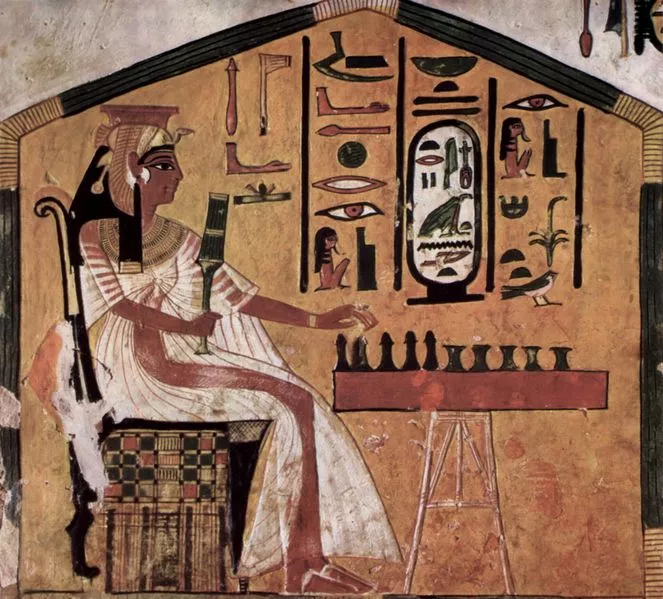
https://boardgamegeek.com/boardgame/2399/senet

In [29]:
# 
df_less_than_zero = df.yearpublished < 0
#df_zero_to_1900 = df.yearpublished >=0 and df.yearpublished <=1900
# use as a filter for rest of dataframe
df[df_less_than_zero] 

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
152,188,Go,-2200,153,2,2,30,180,8,2.0,...,"['(Uncredited)', 'Barbro Hennius', 'Norman Som...","['(Public Domain)', '(Self-Published)', '(Unkn...",['None'],['Abstract Strategy'],"['3M Bookshelf edition', 'Alga Orange Spotted ...",['Enclosure'],"['Joker Go', 'Poker-Go']","['3M Bookshelf Series', 'Combinatorial', 'Go',...","By all appearances, it's just two players taki...",/boardgame/188/go
1222,2397,Backgammon,-3000,1223,2,2,30,30,8,2.0,...,"['(Uncredited)', 'Willem Cornelisz Duyster']","['(Public Domain)', '(Unknown)', '3M', 'Alga',...",['None'],"['Abstract Strategy', 'Dice']","['3M bookcase edition', 'Alga Swedish edition'...","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['Backgammon: Zombie Rush', 'Dargammon', 'Wham...","['3M Bookshelf Series', 'Characters: Austin Po...",Backgammon is a classic abstract strategy game...,/boardgame/2397/backgammon
6826,2399,Senet,-3500,6827,2,2,30,30,6,2.0,...,"['Johan Andreasson', 'Helen Ward']","['(Public Domain)', '(Self-Published)', 'ABRA'...",['None'],"['Abstract Strategy', 'Dice', 'Religious']","['ABRA German wooden edition', 'Belgium editio...","['Dice Rolling', 'Roll / Spin and Move']",['Senet Cardgame'],"['Continent: Africa', 'Country: Egypt', 'Gammon']",Senet is an ancient Egyptian board game simila...,/boardgame/2399/senet
13213,21488,Petteia,-100,13214,2,2,20,20,5,2.0,...,['Nu00e9stor Romeral Andru00e9s'],"['(Public Domain)', 'Geoludie', 'L. P. Septu00...",['None'],['Abstract Strategy'],"['Forster English edition', 'nestorgames editi...","['Action Queue', 'Area Majority / Influence']",['None'],['Petteia'],"Roughly translated as 'Robbers', this abstract...",/boardgame/21488/petteia
17692,19915,Three Men's Morris,-1400,17693,2,2,5,5,5,2.0,...,['(Uncredited)'],"['(Public Domain)', 'Mitra']",['None'],['Abstract Strategy'],['First edition'],"['Pattern Building', 'Point to Point Movement']",['Five Workers Morris'],"['Combinatorial', 'Morris']",This ancient game is probably a direct ancesto...,/boardgame/19915/three-mens-morris
18003,3886,Nine Men's Morris,-1400,18004,2,2,20,20,6,2.0,...,"['Mariela Arratia', 'Dieter Zander']","['(Public Domain)', 'ABRA', 'Adrenaline Brush ...",['None'],"['Abstract Strategy', 'Movies / TV / Radio the...","['ABRA German wooden edition', 'Adrenaline edi...","['Pattern Building', 'Point to Point Movement']",['None'],"['Combinatorial', 'Morris', 'Promotional Board...",Nine Men's Morris is a very old game that has ...,/boardgame/3886/nine-mens-morris
18288,5546,Marbles,-3000,18289,0,0,10,10,4,NaN,...,['(Uncredited)'],"['(Public Domain)', 'Cayro Juegos', 'House of ...",['None'],"['Action / Dexterity', 'Childrens Game', 'Game...","['Cayro Collection Edition', 'English Edition ...","['Action / Dexterity', 'Childrens Game', 'Game...",['None'],"['Finger Flicking Games', 'Marble Games']","Marbles was played by ancient Egyptians, who m...",/boardgame/5546/marbles
18409,5432,Chutes and Ladders,-200,18410,2,6,30,30,3,4.0,...,"['(Uncredited)', 'Wilhelm Busch', 'Lauren Chil...","['(Public Domain)', 'Abel Klinger', 'Adolf Joh...",['None'],"['Animals', 'Childrens Game', 'Dice', 'Movies ...","['Abel Klinger German edition', 'Berliner Germ...","['Dice Rolling', 'Roll / Spin and Move']",['None'],"['Snakes and Ladders', 'Animals: Bears', 'Anim...",Traditional game from ancient India was brough...,/boardgame/5432/chutes-and-ladders
18410,11901,Tic-Tac-Toe,-1300,18411,2,2,1,1,4,2.0,...,['(Uncredited)'],"['(Public Domain)', '(Unknown)', 'ABRA', 'Adre...",['None'],"['Abstract Strategy', 'Childrens Game']","['ABRA German edition', 'Adrenaline Brush Art ...","['Paper-and-Pencil', 'Pattern Building']",['Martian Tic-Tac-Toe'],"['n in a row', 'Animals: Frogs', 'Combinatoria...",A very old game where each player at

In [30]:
# same results but in 1 step
df[df.yearpublished < 0]

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
152,188,Go,-2200,153,2,2,30,180,8,2.0,...,"['(Uncredited)', 'Barbro Hennius', 'Norman Som...","['(Public Domain)', '(Self-Published)', '(Unkn...",['None'],['Abstract Strategy'],"['3M Bookshelf edition', 'Alga Orange Spotted ...",['Enclosure'],"['Joker Go', 'Poker-Go']","['3M Bookshelf Series', 'Combinatorial', 'Go',...","By all appearances, it's just two players taki...",/boardgame/188/go
1222,2397,Backgammon,-3000,1223,2,2,30,30,8,2.0,...,"['(Uncredited)', 'Willem Cornelisz Duyster']","['(Public Domain)', '(Unknown)', '3M', 'Alga',...",['None'],"['Abstract Strategy', 'Dice']","['3M bookcase edition', 'Alga Swedish edition'...","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['Backgammon: Zombie Rush', 'Dargammon', 'Wham...","['3M Bookshelf Series', 'Characters: Austin Po...",Backgammon is a classic abstract strategy game...,/boardgame/2397/backgammon
6826,2399,Senet,-3500,6827,2,2,30,30,6,2.0,...,"['Johan Andreasson', 'Helen Ward']","['(Public Domain)', '(Self-Published)', 'ABRA'...",['None'],"['Abstract Strategy', 'Dice', 'Religious']","['ABRA German wooden edition', 'Belgium editio...","['Dice Rolling', 'Roll / Spin and Move']",['Senet Cardgame'],"['Continent: Africa', 'Country: Egypt', 'Gammon']",Senet is an ancient Egyptian board game simila...,/boardgame/2399/senet
13213,21488,Petteia,-100,13214,2,2,20,20,5,2.0,...,['Nu00e9stor Romeral Andru00e9s'],"['(Public Domain)', 'Geoludie', 'L. P. Septu00...",['None'],['Abstract Strategy'],"['Forster English edition', 'nestorgames editi...","['Action Queue', 'Area Majority / Influence']",['None'],['Petteia'],"Roughly translated as 'Robbers', this abstract...",/boardgame/21488/petteia
17692,19915,Three Men's Morris,-1400,17693,2,2,5,5,5,2.0,...,['(Uncredited)'],"['(Public Domain)', 'Mitra']",['None'],['Abstract Strategy'],['First edition'],"['Pattern Building', 'Point to Point Movement']",['Five Workers Morris'],"['Combinatorial', 'Morris']",This ancient game is probably a direct ancesto...,/boardgame/19915/three-mens-morris
18003,3886,Nine Men's Morris,-1400,18004,2,2,20,20,6,2.0,...,"['Mariela Arratia', 'Dieter Zander']","['(Public Domain)', 'ABRA', 'Adrenaline Brush ...",['None'],"['Abstract Strategy', 'Movies / TV / Radio the...","['ABRA German wooden edition', 'Adrenaline edi...","['Pattern Building', 'Point to Point Movement']",['None'],"['Combinatorial', 'Morris', 'Promotional Board...",Nine Men's Morris is a very old game that has ...,/boardgame/3886/nine-mens-morris
18288,5546,Marbles,-3000,18289,0,0,10,10,4,NaN,...,['(Uncredited)'],"['(Public Domain)', 'Cayro Juegos', 'House of ...",['None'],"['Action / Dexterity', 'Childrens Game', 'Game...","['Cayro Collection Edition', 'English Edition ...","['Action / Dexterity', 'Childrens Game', 'Game...",['None'],"['Finger Flicking Games', 'Marble Games']","Marbles was played by ancient Egyptians, who m...",/boardgame/5546/marbles
18409,5432,Chutes and Ladders,-200,18410,2,6,30,30,3,4.0,...,"['(Uncredited)', 'Wilhelm Busch', 'Lauren Chil...","['(Public Domain)', 'Abel Klinger', 'Adolf Joh...",['None'],"['Animals', 'Childrens Game', 'Dice', 'Movies ...","['Abel Klinger German edition', 'Berliner Germ...","['Dice Rolling', 'Roll / Spin and Move']",['None'],"['Snakes and Ladders', 'Animals: Bears', 'Anim...",Traditional game from ancient India was brough...,/boardgame/5432/chutes-and-ladders
18410,11901,Tic-Tac-Toe,-1300,18411,2,2,1,1,4,2.0,...,['(Uncredited)'],"['(Public Domain)', '(Unknown)', 'ABRA', 'Adre...",['None'],"['Abstract Strategy', 'Childrens Game']","['ABRA German edition', 'Adrenaline Brush Art ...","['Paper-and-Pencil', 'Pattern Building']",['Martian Tic-Tac-Toe'],"['n in a row', 'Animals: Frogs', 'Combinatoria...",A very old game where each player at

In [31]:
# select one column from the filtered results
df[df.yearpublished < 0].name

152                                            Go
1222                                   Backgammon
6826                                        Senet
13213                                     Petteia
17692                          Three Men's Morris
18003                           Nine Men's Morris
18288                                     Marbles
18409                          Chutes and Ladders
18410                                 Tic-Tac-Toe
19022    Hounds and Jackals  Game of the Pharaohs
19512                                       Mehen
Name: name, dtype: object

In [32]:
# value_counts of resulting Series 
df[df.yearpublished < 0].minplayers.value_counts() 

minplayers
2    10
0     1
Name: count, dtype: int64

In [33]:
# boolean filtering with multiple conditions
ancient = df[(df.yearpublished >= 0) & (df.yearpublished > 1900)] # ampersand for AND condition
ancient_no_cred= df[(df.yearpublished <= 0 ) | (df.boardgameartist=='(Uncredited)')] # pipe for OR condition
ancient_no_cred[['name','yearpublished']] 

,name,yearpublished
152,Go,-2200
1222,Backgammon,-3000
1415,Pichenotte,0
2570,Unpublished Prototype,0
2788,Traditional Card Games,0
...,...,...
19821,Mysteries by Vincent Women Only \u2013 High T...,0
19822,The Daisy Diamond Detective Series Episode #1...,0
19824,The Daisy Diamond Detective Series Episode #3...,0
19898,Equate Advanced Tile Set,0


#### sorting

In [34]:
df['boardgamecategory'].sort_values() # sort a column

12220              ['(Public Domain)', '(Self-Published)']
19230    ['(Public Domain)', 'Historical Collections Gr...
4387     ['(Self-Published)', '(Unknown)', '(Web publis...
6687     ['(Self-Published)', 'Broadway Toys LTD', 'cos...
13190    ['(Unknown)', 'The Toy Company Argentina S.R.L.']
                               ...                        
10444                             ['franjos Spieleverlag']
19096                             ['franjos Spieleverlag']
12674                                       ['nikamundus']
13393    ['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...
11602                        ['u685cu904au5eb5 (Ouyuuan)']
Name: boardgamecategory, Length: 20000, dtype: object

In [35]:
df.sort_values(by=['boardgamecategory', 'boardgamemechanic']) # sort a DataFrame by a single column

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
12220,29146,Okey,0,12221,2,4,15,60,0,4.0,...,['(Uncredited)'],"['(Public Domain)', '(Self-Published)']",['None'],"['(Public Domain)', '(Self-Published)']",['Public Domain edition'],['Set Collection'],['None'],"['Card Games: Draw and Discard Games', 'Card G...","Okey is a traditional Turkish game, similar to...",/boardgame/29146/okey
19230,3448,Hazard,1375,19231,2,6,30,30,8,NaN,...,"['Sara Finch', 'Leslie Scott']","['(Public Domain)', 'Historical Collections Gr...",['None'],"['(Public Domain)', 'Historical Collections Gr...",['First edition'],"['Betting and Bluffing', 'Roll / Spin and Move']",['None'],['First edition'],Themed on Chaucer's Canterbury Tales and an ol...,/boardgame/3448/hazard
4387,5985,Miscellaneous Game Accessory,0,4388,0,0,0,0,0,1.0,...,['(Uncredited)'],"['(Self-Published)', '(Unknown)', '(Web publis...",['None'],"['(Self-Published)', '(Unknown)', '(Web publis...","['First edition', 'First edition', 'First edit...","['(Self-Published)', '(Unknown)', '(Web publis...",['None'],['Admin: Miscellaneous Placeholder'],"This isn't really a game, but it should be use...",/boardgame/5985/miscellaneous-game-accessory
6687,234452,Guess Club \u731c\u5fc3\u4ff1\u6a02\u90e8,2017,6688,2,8,20,30,10,5.0,...,"['Cinyee Chiu', 'Missquai']","['(Self-Published)', 'Broadway Toys LTD', 'cos...",['None'],"['(Self-Published)', 'Broadway Toys LTD', 'cos...","['Chinese/English edition', 'Chinese/English/J...","['Betting and Bluffing', 'Hand Management', 'P...",['None'],['Crowdfunding: Zeczec'],Description from the designer: The host of th...,/boardgame/234452/guess-club
13190,76085,Unauthorized Production,2014,13191,2,8,20,20,0,3.0,...,['Reiner Knizia'],"['(Unknown)', 'The Toy Company Argentina S.R.L.']",['None'],"['(Unknown)', 'The Toy Company Argentina S.R.L.']","['Chinese edition', 'Chinese edition', 'Chines...","['(Unknown)', 'The Toy Company Argentina S.R.L.']",['None'],['Admin: Miscellaneous Placeholder'],This is a placeholder for game versions that a...,/boardgame/76085/unauthorized-production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13902,873,Offline,2000,13903,2,4,45,45,10,NaN,...,['Franz-Josef Schulte'],['franjos Spieleverlag'],['None'],['franjos Spieleverlag'],"['First edition', 'First edition']",['Tile Placement'],['None'],"['First edition', 'First edition']",Briefly sold as at Essen 2000 as &amp;quot;Onl...,/boardgame/873/offline
19096,3123,Tr\u00fcffeln Schn\u00fcffeln,1989,19097,2,4,30,30,7,NaN,...,['Franz-Josef Schulte'],['franjos Spieleverlag'],['None'],['franjos Spieleverlag'],['First edition'],['franjos Spieleverlag'],['None'],"['Animals: Pigs', 'Tube Games']",Move pigs around the track in the forest to fi...,/boardgame/3123/truffeln-schnuffeln
12674,209649,Aurimentic,2016,12675,2,4,45,90,12,3.0,...,['Thalia Bru00fcckner'],['nikamundus'],['None'],['nikamundus'],['First edition'],"['Area Majority / Influence', 'Dice Rolling', ...",['None'],['First edition'],The flooding was massive and pulled the fields...,/boardgame/209649/aurimentic
13393,187806,TimeBomb II,2015,13394,4,6,1,30,0,NaN,...,['u4f50u85e4 u96c4u4ecb (Yusuke Sato)'],['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,['None'],['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,"['Japanese edition', 'Multilingual first editi...",['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,['None'],['Admin: Better Description Needed!'],TimeBomb II has a title and a few other detail...,/boardgame/187806/timebomb-ii


In [36]:
df.sort_values(by='boardgamemechanic', ascending=False) # use descending order instead

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
13393,187806,TimeBomb II,2015,13394,4,6,1,30,0,NaN,...,['u4f50u85e4 u96c4u4ecb (Yusuke Sato)'],['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,['None'],['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,"['Japanese edition', 'Multilingual first editi...",['u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (Ne...,['None'],['Admin: Better Description Needed!'],TimeBomb II has a title and a few other detail...,/boardgame/187806/timebomb-ii
19096,3123,Tr\u00fcffeln Schn\u00fcffeln,1989,19097,2,4,30,30,7,NaN,...,['Franz-Josef Schulte'],['franjos Spieleverlag'],['None'],['franjos Spieleverlag'],['First edition'],['franjos Spieleverlag'],['None'],"['Animals: Pigs', 'Tube Games']",Move pigs around the track in the forest to fi...,/boardgame/3123/truffeln-schnuffeln
18547,1179,Tendix,1998,18548,2,3,45,45,0,2.0,...,['Dirk Henn'],['db-Spiele'],['None'],['db-Spiele'],['First edition'],['db-Spiele'],['None'],['First edition'],PROCESS OF GAME The player whose turn it is dr...,/boardgame/1179/tendix
15802,146299,Bowling for Zombies!!!,2013,15803,2,5,15,15,0,NaN,...,['Holger Christiansen'],['Twilight Creations'],['None'],['Zombies'],['First edition'],['Zombies'],['None'],"['Admin: Better Description Needed!', 'Sports:...",Game description from the publisher: Once aga...,/boardgame/146299/bowling-zombies
18521,1075,Big Bang,1995,18522,2,4,15,15,5,NaN,...,"['Kai Schanzl', 'Mona Schu00fcling']",['Zoch Verlag'],['None'],['Zoch Verlag'],['First edition'],['Zoch Verlag'],['None'],['First edition'],"The game comes with a wooden game board, 6 ma...",/boardgame/1075/big-bang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18691,1801,Clean Sweep,2001,18692,2,5,20,20,6,NaN,...,['Travis Eberle'],['(Unknown)'],['None'],['(Unknown)'],['First edition'],['(Unknown)'],['None'],['First edition'],The gameboard has spaces for the numbers one t...,/boardgame/1801/clean-sweep
3121,23953,Outside the Scope of BGG,0,3122,0,0,0,0,0,NaN,...,['(Uncredited)'],['(Unknown)'],['None'],['(Unknown)'],['(Unknown)'],['(Unknown)'],['None'],"['Admin: Miscellaneous Placeholder', 'Admin: O...",Outside the Scope... is one of several catch-a...,/boardgame/23953/outside-scope-bgg
19082,3094,Patch Worlds,2001,19083,1,8,10,10,6,NaN,...,['(Uncredited)'],['(Unknown)'],['None'],['(Unknown)'],['First edition'],['(Unknown)'],['None'],['First edition'],Innovative board game presenting you the theor...,/boardgame/3094/patch-worlds
13190,76085,Unauthorized Production,2014,13191,2,8,20,20,0,3.0,...,['Reiner Knizia'],"['(Unknown)', 'The Toy Company Argentina S.R.L.']",['None'],"['(Unknown)', 'The Toy Company Argentina S.R.L.']","['Chinese edition', 'Chinese edition', 'Chines...","['(Unknown)', 'The Toy Company Argentina S.R.L.']",['None'],['Admin: Miscellaneous Placeholder'],This is a placeholder for game versions that a...,/boardgame/76085/unauthorized-production


In [37]:
# put NA, NAN NAS first
df.sort_values(by='min_community', ascending=False, na_position='first')

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
45,121921,Robinson Crusoe Adventures on the Cursed Island,2012,46,1,4,60,120,14,NaN,...,"['Tomasz Bentkowski', 'Mateusz Bielski', 'Vinc...","['Portal Games', 'Albi', 'Conclave Editora', '...",['2013 Golden Geek Best Board Game Artwork/Pre...,"['Adventure', 'Exploration', 'Fighting', 'Nove...","['Czech first edition', 'Czech second edition'...","['Action Queue', 'Cooperative Game', 'Dice Rol...","['Brettspiel Adventskalender 2016', 'Experimen...",['Robinson Crusoe: Adventures on the Cursed Is...,Robinson Crusoe: Adventures on the Cursed Isla...,/boardgame/121921/robinson-crusoe-adventures-c...
147,223321,Detective A Modern Crime Board Game,2018,148,1,5,120,180,16,NaN,...,"['Aga Jakimiec', 'Ewa Kostorz', 'Rafau0142 Szy...","['Portal Games', 'GaGa Games', 'IELLO', 'Korea...",['2018 Cardboard Republic Immersionist Laurel ...,"['Deduction', 'Murder/Mystery']","['Czech edition', 'Dutch edition', 'English fi...","['Cooperative Game', 'Solo / Solitaire Game', ...","['Detective: L.A. Crimes', 'Detective: A Mode...","['Detective: A Modern Crime Board Game', 'Digi...",In Detective: A Modern Crime Board Game you ar...,/boardgame/223321/detective-modern-crime-board...
308,224783,Vindication,2018,309,2,5,45,150,14,NaN,...,"['Noah Adelman', 'Brett Carville', 'Emiliano C...",['Orange Nebula'],['2018 Cardboard Republic Daredevil Laurel Nom...,['Fantasy'],"['English regular edition', 'English second ed...","['Area Majority / Influence', 'Dice Rolling', ...",['Vindication: Board Game Spotlight Promo Pair...,"['Crowdfunding: Kickstarter', 'Game Trayz Insi...",Vindication (formerly Epoch: The Awakening) is...,/boardgame/224783/vindication
339,162082,Deus,2014,340,2,4,60,90,14,NaN,...,"['Mau00ebva da Silva', 'Christine Deschamps', ...","['Pearl Games', 'Asmodee', 'Asterion Press', '...",['2014 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Mythology']","['English first edition', 'English second edit...","['Area Majority / Influence', 'Grid Movement',...","['Deus: Egypt', 'Deus: Promo Temples']",['Tableau Building'],"In Deus, players work to develop their own civ...",/boardgame/162082/deus
357,119506,Freedom The Underground Railroad,2012,358,1,4,60,120,13,NaN,...,"['Jarek Nocou0144', 'Steve Paschal']","['Academy Games', '(Web published)', 'ASYNCRON...",['2013 Golden Geek Best Thematic Board Game No...,"['American Civil War', 'Economic', 'Educationa...","['English first edition', 'English fourth edit...","['Cooperative Game', 'Pick-up and Deliver', 'P...",['Freedom: The Underground Railroad u2013 Prom...,"['Country: USA', 'Crowdfunding: Kickstarter', ...","Early in the history of the United States, sla...",/boardgame/119506/freedom-underground-railroad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5066,237174,So Long,2018,5067,1,5,30,40,16,1.0,...,"['Enrica Fincati', 'Francesco Simioni', 'Lorin...",['Axis Mundi'],['None'],"['Bluffing', 'Card Game', 'Deduction', 'Horror']",['First edition'],"['Card Drafting', 'Hand Management', 'Simultan...","['So Long', 'So Long', 'So Long', 'So Long']","['Campaign Games', 'Crowdfunding: Kickstarter'...","Humanity is dying, and there's no escaping it....",/boardgame/237174/so-long-my-world
2050,28829,Field Commander Rommel,2008,2051,1,1,120,120,12,1.0,...,['Dan Verssen'],['Dan Verssen Games (DVG)'],['2008 Golden Geek Best Wargame Nominee'],"['Wargame', 'World War II']","['First edition', 'Second edition']","['Area Movement', 'Dice Rolling']",['None'],"['Field Commander Series', 'Solitaire Games', ...",Rommel was designed by Dan Verssen and is the ...,/boardgame/28829/field-commander-rommel
7472,148471,Vietnam Solitaire Special Edition,2013,7473,1,2,60,60,12,1.0,...,"['Steve Kling', 'Mike Mirfin']"

In [38]:
#### Summarize

In [39]:
df.describe(include=['float']) # describe all object columns

,min_community,max_community,average,baverage,stddev,avgweight
count,14141.000000,14803.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.203522,4.277917,6.275440,5.297689,1.499691,1.931761
std,1.398935,2.155624,1.065339,1.494174,0.340743,0.897206
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,5.712778,5.502933,1.309920,1.255050
50%,3.000000,4.000000,6.354170,5.545040,1.471575,1.910900
75%,4.000000,5.000000,6.955793,5.674960,1.663782,2.500000
max,31.000000,31.000000,9.442860,8.584240,4.500000,5.000000


In [40]:
df.describe(include='object') # describe all columns

,name,playerage,label,boardgamedesigner,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,19546,76,1,8552,10794,10006,2582,6401,7893,6456,4305,9746,19985,20000
top,Warhammer 40,(no votes),Board Game,"['(Uncredited)""']",['(Uncredited)'],['GMT Games'],['None'],['Card Game'],['First edition'],['Hexagon Grid'],['None'],['First edition'],"Dice Throne is a game of intriguing dice, tact...",/boardgame/174430/gloomhaven
freq,20,6398,20000,1743,1757,214,16482,938,7437,871,15455,2084,4,1


In [41]:
df.describe(include='all')

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
count,20000.00000,20000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,14141.000000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,NaN,19546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10794,10006,2582,6401,7893,6456,4305,9746,19985,20000
top,NaN,Warhammer 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,['(Uncredited)'],['GMT Games'],['None'],['Card Game'],['First edition'],['Hexagon Grid'],['None'],['First edition'],"Dice Throne is a game of intriguing dice, tact...",/boardgame/174430/gloomhaven
freq,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1757,214,16482,938,7437,871,15455,2084,4,1
mean,88667.61500,NaN,1981.268700,10000.500000,2.055250,5.59215,68.096450,94.28945,9.476350,3.203522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,90640.91959,NaN,219.223277,5773.647028,0.745537,15.04921,466.502106,1005.75196,3.738842,1.398935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,-3500.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5858.75000,NaN,1997.000000,5000.750000,2.000000,4.00000,20.000000,30.00000,8.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39278.50000,NaN,2008.000000,10000.500000,2.000000,4.00000,30.000000,45.00000,10.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,169680.50000,NaN,2015.000000,15000.250000,2.000000,6.00000,60.000000,90.00000,12.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.maxplaytime.describe() # describe a single column

count     20000.00000
mean         94.28945
std        1005.75196
min           0.00000
25%          30.00000
50%          45.00000
75%          90.00000
max      120000.00000
Name: maxplaytime, dtype: float64

before looking this up I'm going to guess that the max game time 120000 is the Campaign for North Africa seen here on the Big Bang Theory
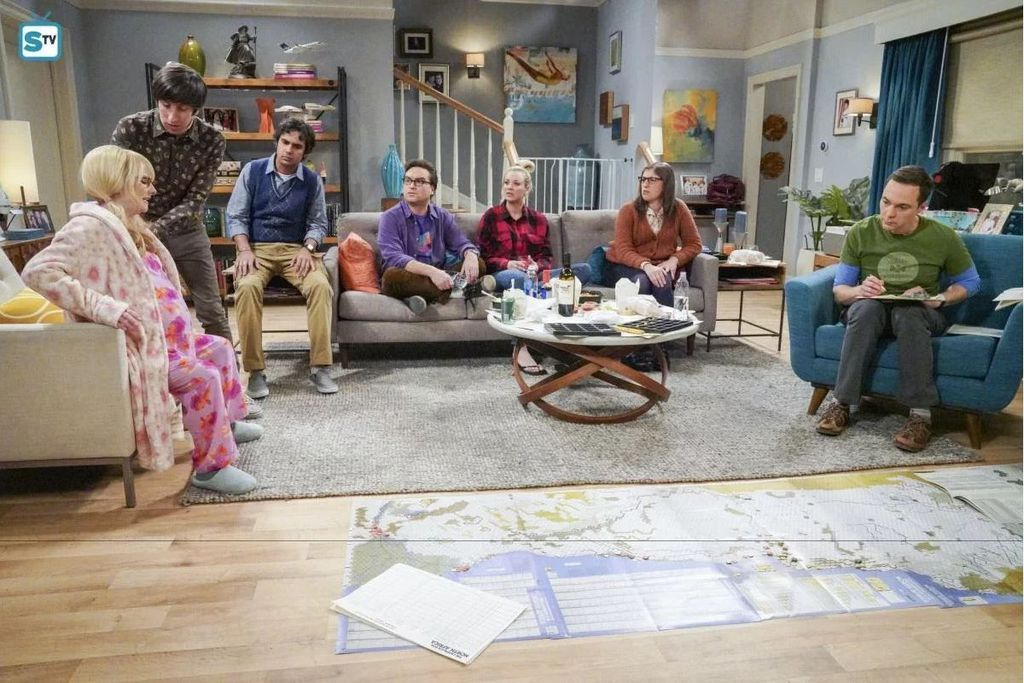

In [43]:
# practice filtering to see if I'm right.

In [44]:
df.maxplaytime.mean() # only calculate the mean

94.28945

In [45]:
df.maxplaytime.value_counts() # most useful for categorical variables

maxplaytime
30      3596
60      2982
45      2146
20      1998
120     1611
        ... 
450        1
3900       1
97         1
700        1
68         1
Name: count, Length: 109, dtype: int64

In [46]:
df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

In [47]:
df.groupby(['maxplaytime','minplayers']).size()

maxplaytime  minplayers
0            0              42
             1              95
             2             405
             3              62
             4              18
                          ... 
14400        2               1
17280        2               1
22500        1               1
60000        8               1
120000       2               1
Length: 288, dtype: int64

In [48]:
#### Unique and Missing Values

In [49]:
df['average'].unique() #display unique values


array([8.85292, 8.62499, 8.42299, ..., 5.34615, 5.97222, 5.14444])

In [50]:
df_countd = df['average'].value_counts() #counting the unique values
print(df_countd)

average
0.00000    95
5.00000    55
6.00000    47
5.50000    44
7.00000    27
           ..
7.21989     1
8.79219     1
6.87653     1
7.25867     1
5.14444     1
Name: count, Length: 17921, dtype: int64


In [51]:
df.loc[df.duplicated()] # display duplicate records

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink


In [52]:
# drop duplicates
df.drop_duplicates()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,...,"['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",Brass: Birmingham is an economic strategy game...,/boardgame/224517/brass-birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5154,Franchise,1990,19996,2,8,90,90,0,NaN,...,['(Uncredited)'],['Herrin & Kramer'],['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']","['Simulation', 'Trading']",['None'],['Sports: Baseball'],The goal of Franchise is to accumulate the mos...,/boardgame/5154/franchise
19996,5158,Punto y Raya,1988,19997,2,2,20,20,0,NaN,...,['(Uncredited)'],['CEFA (Celulosa Fabril S. A.)'],['None'],['Abstract Strategy'],['Enclosure'],['Enclosure'],['None'],['Dots and Boxes'],Punto y Raya translates as &amp;quot;Point and...,/boardgame/5158/punto-y-raya
19997,5159,3 Up,1972,19998,2,4,20,20,5,NaN,...,['(Uncredited)'],"['Airfix', 'Lakeside', 'Wexler and Sons']",['None'],"['Abstract Strategy', 'Childrens Game']","['Airfix edition', 'Lakeside edition', 'Wexler...",['Pattern Building'],['None'],"['Airfix edition', 'Lakeside edition', 'Wexler...",The players alternate placing their six discs ...,/boardgame/5159/3
19998,5160,Dino-Checkers,1989,19999,2,2,30,30,6,NaN,...,['(Uncredited)'],"['Bright Child Toys', 'Educatio

In [53]:
df.isnull().sum() # sums null values field

objectid                     0
name                         0
yearpublished                0
sortindex                    0
minplayers                   0
maxplayers                   0
minplaytime                  0
maxplaytime                  0
minage                       0
min_community             5859
max_community             5197
totalvotes                   0
playerage                    0
languagedependence           0
usersrated                   0
average                      0
baverage                     0
stddev                       0
avgweight                    0
numweights                   0
numgeeklists                 0
numtrading                   0
numwanting                   0
numcomments                  0
siteviews                    0
numplays                     0
numplays_month               0
news                         0
blogs                        0
weblink                      0
podcast                      0
label                        0
boardgam

In [54]:
(df == 0).sum()

objectid                      0
name                          0
yearpublished               188
sortindex                     0
minplayers                   81
maxplayers                  208
minplaytime                 534
maxplaytime                 624
minage                     1426
min_community                 0
max_community                 0
totalvotes                 3686
playerage                     0
languagedependence         6851
usersrated                   95
average                      95
baverage                   1394
stddev                      179
avgweight                   964
numweights                  964
numgeeklists                 51
numtrading                 1131
numwanting                 2182
numcomments                 130
siteviews                     0
numplays                    290
numplays_month            11857
news                      14845
blogs                      8400
weblink                    3644
podcast                   13092
label   

In [55]:
(df == '').sum()

objectid                  0
name                      0
yearpublished             0
sortindex                 0
minplayers                0
maxplayers                0
minplaytime               0
maxplaytime               0
minage                    0
min_community             0
max_community             0
totalvotes                0
playerage                 0
languagedependence        0
usersrated                0
average                   0
baverage                  0
stddev                    0
avgweight                 0
numweights                0
numgeeklists              0
numtrading                0
numwanting                0
numcomments               0
siteviews                 0
numplays                  0
numplays_month            0
news                      0
blogs                     0
weblink                   0
podcast                   0
label                     0
boardgamedesigner_cnt     0
boardgameartist_cnt       0
boardgamepublisher_cnt    0
boardgamehonor_cnt  

In [56]:
#identify missing values 
df.loc[df['min_community'].isnull()]

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
45,121921,Robinson Crusoe Adventures on the Cursed Island,2012,46,1,4,60,120,14,NaN,...,"['Tomasz Bentkowski', 'Mateusz Bielski', 'Vinc...","['Portal Games', 'Albi', 'Conclave Editora', '...",['2013 Golden Geek Best Board Game Artwork/Pre...,"['Adventure', 'Exploration', 'Fighting', 'Nove...","['Czech first edition', 'Czech second edition'...","['Action Queue', 'Cooperative Game', 'Dice Rol...","['Brettspiel Adventskalender 2016', 'Experimen...",['Robinson Crusoe: Adventures on the Cursed Is...,Robinson Crusoe: Adventures on the Cursed Isla...,/boardgame/121921/robinson-crusoe-adventures-c...
147,223321,Detective A Modern Crime Board Game,2018,148,1,5,120,180,16,NaN,...,"['Aga Jakimiec', 'Ewa Kostorz', 'Rafau0142 Szy...","['Portal Games', 'GaGa Games', 'IELLO', 'Korea...",['2018 Cardboard Republic Immersionist Laurel ...,"['Deduction', 'Murder/Mystery']","['Czech edition', 'Dutch edition', 'English fi...","['Cooperative Game', 'Solo / Solitaire Game', ...","['Detective: L.A. Crimes', 'Detective: A Mode...","['Detective: A Modern Crime Board Game', 'Digi...",In Detective: A Modern Crime Board Game you ar...,/boardgame/223321/detective-modern-crime-board...
308,224783,Vindication,2018,309,2,5,45,150,14,NaN,...,"['Noah Adelman', 'Brett Carville', 'Emiliano C...",['Orange Nebula'],['2018 Cardboard Republic Daredevil Laurel Nom...,['Fantasy'],"['English regular edition', 'English second ed...","['Area Majority / Influence', 'Dice Rolling', ...",['Vindication: Board Game Spotlight Promo Pair...,"['Crowdfunding: Kickstarter', 'Game Trayz Insi...",Vindication (formerly Epoch: The Awakening) is...,/boardgame/224783/vindication
339,162082,Deus,2014,340,2,4,60,90,14,NaN,...,"['Mau00ebva da Silva', 'Christine Deschamps', ...","['Pearl Games', 'Asmodee', 'Asterion Press', '...",['2014 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Mythology']","['English first edition', 'English second edit...","['Area Majority / Influence', 'Grid Movement',...","['Deus: Egypt', 'Deus: Promo Temples']",['Tableau Building'],"In Deus, players work to develop their own civ...",/boardgame/162082/deus
357,119506,Freedom The Underground Railroad,2012,358,1,4,60,120,13,NaN,...,"['Jarek Nocou0144', 'Steve Paschal']","['Academy Games', '(Web published)', 'ASYNCRON...",['2013 Golden Geek Best Thematic Board Game No...,"['American Civil War', 'Economic', 'Educationa...","['English first edition', 'English fourth edit...","['Cooperative Game', 'Pick-up and Deliver', 'P...",['Freedom: The Underground Railroad u2013 Prom...,"['Country: USA', 'Crowdfunding: Kickstarter', ...","Early in the history of the United States, sla...",/boardgame/119506/freedom-underground-railroad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5153,Fascination Checkers,1962,19995,2,2,20,20,7,NaN,...,['(Uncredited)'],['REMCO Games'],['None'],['Abstract Strategy'],['First edition'],['Abstract Strategy'],['None'],['First edition'],"The board measures 10&amp;times;10, with four ...",/boardgame/5153/fascination-checkers
19995,5154,Franchise,1990,19996,2,8,90,90,0,NaN,...,['(Uncredited)'],['Herrin & Kramer'],['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']","['Simulation', 'Trading']",['None'],['Sports: Baseball'],The goal of Franchise is to accumulate the mos...,/boardgame/5154/franchise
19996,5158,Punto y Raya,1988,19997,2,2,20,20,0,NaN,...,['(Uncredited)'],['CEFA (Celulosa Fabril S. A.)'],['None'],['Abstract Strategy'],['Enclosure'],['Enclosure'],['None'],['Dots and Boxes'],Punto y Raya translates as &amp;quot;Point and...,/boardgame/5158/punto-y-raya
19997,5159,3 Up,1972,19998,2,4,20,20,5,NaN,...,['(Uncredited)'],"['Airfix', 'Lakeside', 'Wexler and Sons']"

In [57]:
# (df == 0).sum()
df.loc[df['average']==0]

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
18424,318,Looney Leo,0,18425,0,0,0,0,0,NaN,...,['Eric Alleman'],['(Self-Published)'],['None'],['Humor'],"['Auction/Bidding', 'Trading']","['Auction/Bidding', 'Trading']",['None'],['Admin: Better Description Needed!'],A home- made game by Eric Alleman. Read the Sc...,/boardgame/318/looney-leo
18489,946,Rolazone,1999,18490,2,2,30,30,0,NaN,...,"['A. Davis', 'G. Tomlinson', 'Gerry Tomlinson']",['Omshanti Limited'],['None'],"['Action / Dexterity', 'Sports']","['Action / Dexterity', 'Sports']","['Action / Dexterity', 'Sports']",['None'],['Tube Games'],ROLAZONE is a new 2 player chill-out game with...,/boardgame/946/rolazone
18492,962,Contango,2000,18493,2,6,90,90,10,NaN,...,['S. Schwab'],['Contango Concepts'],['None'],"['Abstract Strategy', 'Deduction', 'Dice', 'Ec...","['Auction/Bidding', 'Commodity Speculation', '...","['Auction/Bidding', 'Commodity Speculation', '...",['None'],"['Auction/Bidding', 'Commodity Speculation', '...","CONTANGO ""The Ultimate Stock Market Game"" Wan...",/boardgame/962/contango
18530,1097,Don't Give Up Your Day Job!,2000,18531,6,41,120,120,8,NaN,...,['(Uncredited)'],['Cookie Jar Caveman'],['None'],"['Music', 'Party Game', 'Trivia']",['Print and Play edition'],"['Acting', 'Cooperative Game', 'Singing']",['None'],['Print and Play edition'],Described by the Publisher/Designer: Are you ...,/boardgame/1097/dont-give-your-day-job
18540,1151,Money,2000,18541,2,6,90,90,8,NaN,...,"['Troy McNair', 'Yvonne McNair']",['McNair Games'],['None'],['Negotiation'],['Trading'],['Trading'],['None'],['Trading'],From the Publisher/Designer: Game that target...,/boardgame/1151/money-power-respect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,5027,Torpedo Run Card Game Deluxe Edition,1983,19920,2,5,30,30,8,NaN,...,['(Uncredited)'],['Ramco Games'],['None'],"['Card Game', 'Modern Warfare', 'Wargame']",['First edition'],"['Hand Management', 'Secret Unit Deployment']",['None'],['First edition'],Additional details from the instruction bookle...,/boardgame/5027/torpedo-run-card-game-deluxe-e...
19943,5085,Lucan,1978,19944,2,4,45,45,7,NaN,...,['(Uncredited)'],['Milton Bradley'],['None'],['Movies / TV / Radio theme'],['First edition'],['Roll / Spin and Move'],['None'],['First edition'],From the box: In this game adapted from the T...,/boardgame/5085/lucan
19950,5094,The Ugly Duckling Game,1977,19951,2,4,20,20,4,NaN,...,['(Uncredited)'],['Cadaco'],['None'],['Childrens Game'],['First edition'],['Roll / Spin and Move'],['None'],"['Animals: Ducks', 'Celebrities: Hans Christia...",The most basic of children's games. Spin the ...,/boardgame/5094/ugly-duckling-game
19975,5124,Take-Off,1959,19976,1,2,20,20,0,NaN,...,['(Uncredited)'],['Tryne'],['None'],['Action / Dexterity'],['First edition'],['Action / Dexterity'],['None'],['First edition'],This is an interesting older dexterity game th...,/boardgame/5124/magnetic-takeoff


In [58]:
#removing rows - I would not drop these rows but I would want to understand the 0's better for now I may created alternate datasets
# however here is an example to dropna
df2 = df.dropna()

In [59]:
#imputing rows basic example
df2 = df['min_community'] = df['min_community'].fillna(df['min_community'].median())
df2.head(17)

0     3.0
1     4.0
2     3.0
3     3.0
4     3.0
5     6.0
6     2.0
7     2.0
8     3.0
9     4.0
10    3.0
11    2.0
12    2.0
13    4.0
14    2.0
15    2.0
16    1.0
Name: min_community, dtype: float64

In [60]:
# fixing column values #### fix
df['test'] = 'test'
df
df['testing'] = [i if i[1] in 'passed' else i[0]+'failed' for i in df['test']]
print(df['testing'])


0        test
1        test
2        test
3        test
4        test
         ... 
19995    test
19996    test
19997    test
19998    test
19999    test
Name: testing, Length: 20000, dtype: object


In [61]:
#creating a separate dataset with a list
wotr = df.loc[df['name'].isin(['War of the Ring', 'The Battle of Five Armies', 'Middle-Earth Quest'])][[
    'name','yearpublished','totalvotes','usersrated','average', 'baverage']]
wotr

,name,yearpublished,totalvotes,usersrated,average,baverage
100,War of the Ring,2004,316,9605,7.77255,7.45356
459,The Battle of Five Armies,2014,25,2074,7.88015,6.89994
516,Middle-Earth Quest,2009,132,3810,7.37749,6.84512
2710,War of the Ring,1977,22,903,6.62497,5.91286
6454,War of the Ring,2009,8,113,7.02088,5.60836
6637,The Battle of Five Armies,2005,1,114,6.99868,5.60287
8213,The Battle of Five Armies,1984,3,104,6.50577,5.56707


In [62]:
#ensuring column names !!CAREFUL!!
df['name'].unique()
print(df['name'])

0                                           Gloomhaven
1                            Pandemic Legacy  Season 1
2                                    Terraforming Mars
3        Through the Ages  A New Story of Civilization
4                                    Brass  Birmingham
                             ...                      
19995                                        Franchise
19996                                     Punto y Raya
19997                                             3 Up
19998                                    Dino-Checkers
19999                                        Obsession
Name: name, Length: 20000, dtype: object


In [63]:
#ensuring data format
df['yearpublished'] = pd.to_datetime(df['yearpublished'])


In [64]:
#isolating values
df.loc[df['name'].astype(str).str.len() >= 100]


,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink,test,testing
380,193042,Junk Art \u03b7 \u03a4\u03ad\u03c7\u03bd\u03b...,1970-01-01 00:00:00.000002016,381,2,6,30,30,8,4.0,...,['2016 Golden Geek Best Family Board Game Nomi...,"['Action / Dexterity', 'Party Game']","['Dutch/French edition', 'English-only plastic...","['Hand Management', 'Player Elimination', 'Sta...",['None'],"['3D Games', 'Games by the Game Artisans of Ca...","In Junk Art, players are presented with junk f...",/boardgame/193042/junk-art,test,test
1316,54137,Battle Sheep \u0e2a\u0e21\u0e23\u0e20\u0e39\u0...,1970-01-01 00:00:00.000002010,1317,2,4,15,15,7,4.0,...,"['2014 Lys Enfant Finalist', '2014 Spiel der S...","['Abstract Strategy', 'Animals']","['Chinese edition', 'Czech edition', 'English-...","['Enclosure', 'Grid Movement', 'Modular Board']",['None'],"['3D Games', 'Animals: Sheep', 'Blue Orange Ga...","In Battle Sheep (first released as Splits), pl...",/boardgame/54137/battle-sheep,test,test
2210,135649,\u03a4\u03b1 \u03a4\u03c1\u03af\u03b1 \u039c\u...,1970-01-01 00:00:00.000002013,2211,2,5,20,20,7,4.0,...,['2013 Golden Geek Best Childrens Board Game N...,"['Animals', 'Childrens Game', 'Dice', 'Novel-b...","['Czech/Slovak first edition', 'English first ...","['Dice Rolling', 'Push Your Luck', 'Take That']",['Tales & Games: The Three Little Pigs u2013 B...,"['Animals: Pigs', 'Animals: Wolves', 'Tales & ...","As a little pig, your dearest wish is to build...",/boardgame/135649/tales-games-three-little-pigs,test,test
4524,3563,The Lord of the Rings The Fellowship of the R...,1970-01-01 00:00:00.000002001,4525,2,2,90,90,12,2.0,...,['None'],"['Fantasy', 'Miniatures', 'Movies / TV / Radio...","['English edition', 'Spanish edition']","['Campaign / Battle Card Driven', 'Modular Boa...",['None'],['The Lord of the Rings: Strategy Battle Game'...,Choose to play the forces of good or evil and ...,/boardgame/3563/lord-rings-fellowship-ring,test,test
4697,192656,\u041a\u043e\u0448\u043c\u0430\u0440\u0438\u04...,1970-01-01 00:00:00.000002014,4698,2,5,10,30,10,3.0,...,['None'],"['Card Game', 'Fantasy']","['English-only edition', 'English/Russian firs...","['Hand Management', 'Set Collection']",['None'],['Crowdfunding: Kickstarter'],A game about building nightmares so terrifying...,/boardgame/192656/nightmarium,test,test


In [65]:
#display mean value per year
df2 = df.loc[df['yearpublished'] > pd.to_datetime(2015)] 
tbl = df2.groupby('boardgamedesigner')['baverage'].mean().round(1)
print(tbl)

boardgamedesigner
['(Uncredited)"']                                            5.6
['A. J. Porfirio"']                                          5.9
['AEG Black Friday Black Box 2015"']                         5.5
['AJ Lambeth"']                                              5.7
['AL Garc\\u00eda"']                                         5.6
                                                            ... 
['\\u9577\\u8c37\\u5ddd \\u767b\\u9bc9 (Tori Hasegawa)"']    5.5
['jim pinto"']                                               5.5
['shane007"']                                                5.5
['team SAIEN"']                                              5.6
['yio"', 'Muneyuki Yokouchi"']                               5.6
Name: baverage, Length: 2796, dtype: float64


array([[<Axes: title={'center': 'baverage'}>]], dtype=object)

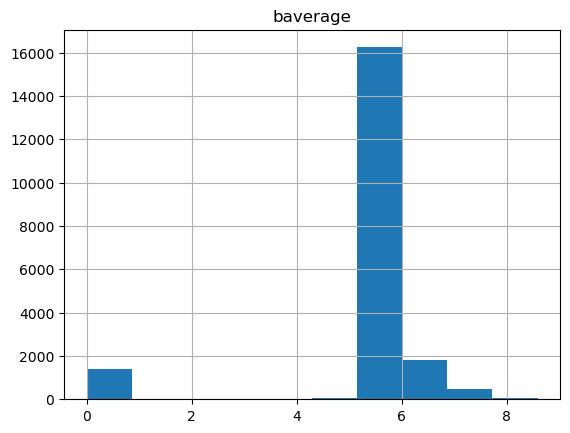

In [66]:
#create histograms
df[['baverage'] ].hist()

<Axes: xlabel='avgweight', ylabel='baverage'>

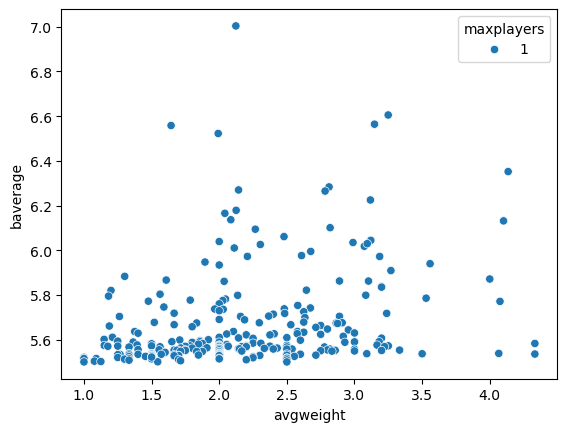

In [67]:
import seaborn as sns
dfavg =df.query("baverage.round(0) >5 and maxplayers >0 and maxplayers <2 and avgweight >=1")
sns.scatterplot(data=dfavg,  x="avgweight", y="baverage", hue="maxplayers")

In [68]:
dfavg.query("avgweight > 4 and baverage >6.2")

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink,test,testing
1233,22877,Fields of Fire,1970-01-01 00:00:00.000002008,1234,1,1,300,300,12,1.0,...,['2008 Charles S. Roberts Best Post-WW2 era Bo...,"['Korean War', 'Vietnam War', 'Wargame', 'Worl...","['First edition', 'Second edition']","['Campaign / Battle Card Driven', 'Modular Boa...",['None'],"['Solitaire Games', 'Solitaire Wargames']",Fields of Fire is a solitaire game of commandi...,/boardgame/22877/fields-fire,test,test


In [69]:
#plotting a boxplot and save out
df.boxplot(['baverage','avgweight'])
plt.savefig('gameplot.jpg')
plt.close()

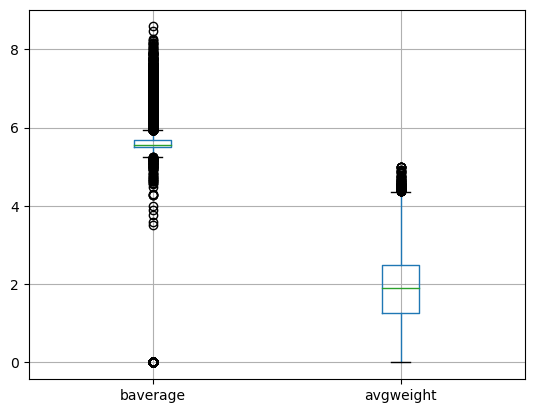

In [70]:
#plotting boxplot
df.boxplot(['baverage','avgweight'])
plt.show()

## Lets make a hypothesis
The ranking system seems to favor popular games. How can I find games that might be fun even if they don't have the total number of votes needed to indicate that it is fun. 
If you choose the right category, complexity and mechanics and sentiment you can find games that may not have high scores based on BGG but are still viable as good games to try. 

We can always change our dataset around but lets start by keeping it simple and making some requirements
- year is not a factor so bring in all years
- we want the minplayer to be greater than 0 and the max player to be less than 6
- Minplaytime should be greater than 20minutes.
- **Some fields of interest.** 
Total number of votes, userrated, average, baverage, stddev of rating, avgweight, numweight votes, numwanting, siteviews
**future steps**
boardgamecategory_cnt, board_game_category, boardgame mechanics, boardgamecategory

In [71]:
# LOAD A FILE 
columns = ['name', 'yearpublished', 'minplayers', 'maxplayers','minplaytime', 'totalvotes',
           'usersrated', 'average', 'baverage','stddev', 'avgweight', 'numweights', 'numwanting'
           , 'siteviews']

new_cols = ['name','year','mnplyrs','mxplyrs', 'mnptime','votes', 'usrrate','avg','bavg','stddev',
            'complexity', 'complexity_votes','numwant','views']
url = 'C://Users//Matth//OneDrive//Desktop/DATA//'
file ='bggdata.csv'
bgg_org = pd.read_csv(url+file, header= 0,  usecols = columns )
bgg_org.columns = new_cols
bgg_org

,name,year,mnplyrs,mxplyrs,mnptime,votes,usrrate,avg,bavg,stddev,complexity,complexity_votes,numwant,views
0,Gloomhaven,2017,1,4,60,827,31254,8.85292,8.58424,1.59819,3.8078,1311,1365,8933078
1,Pandemic Legacy Season 1,2015,2,4,60,549,34729,8.62499,8.47159,1.59463,2.8301,971,771,2971746
2,Terraforming Mars,2016,1,5,120,1252,48339,8.42299,8.26781,1.36938,3.2313,1863,2068,4724387
3,Through the Ages A New Story of Civilization,2015,2,4,120,436,18269,8.49419,8.23513,1.49542,4.3850,891,1049,2448074
4,Brass Birmingham,2018,2,4,60,242,10070,8.62031,8.20459,1.22876,3.9122,467,1077,894621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,2,8,90,0,3,6.00000,0.00000,2.94392,0.0000,0,0,3569
19996,Punto y Raya,1988,2,2,20,0,1,4.00000,0.00000,0.00000,0.0000,0,0,2752
19997,3 Up,1972,2,4,20,0,1,6.00000,0.00000,0.00000,0.0000,0,0,8073
19998,Dino-Checkers,1989,2,2,30,0,20,5.77500,0.00000,1.76405,0.0000,0,1,8601


In [72]:
(bgg_org)

,name,year,mnplyrs,mxplyrs,mnptime,votes,usrrate,avg,bavg,stddev,complexity,complexity_votes,numwant,views
0,Gloomhaven,2017,1,4,60,827,31254,8.85292,8.58424,1.59819,3.8078,1311,1365,8933078
1,Pandemic Legacy Season 1,2015,2,4,60,549,34729,8.62499,8.47159,1.59463,2.8301,971,771,2971746
2,Terraforming Mars,2016,1,5,120,1252,48339,8.42299,8.26781,1.36938,3.2313,1863,2068,4724387
3,Through the Ages A New Story of Civilization,2015,2,4,120,436,18269,8.49419,8.23513,1.49542,4.3850,891,1049,2448074
4,Brass Birmingham,2018,2,4,60,242,10070,8.62031,8.20459,1.22876,3.9122,467,1077,894621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,2,8,90,0,3,6.00000,0.00000,2.94392,0.0000,0,0,3569
19996,Punto y Raya,1988,2,2,20,0,1,4.00000,0.00000,0.00000,0.0000,0,0,2752
19997,3 Up,1972,2,4,20,0,1,6.00000,0.00000,0.00000,0.0000,0,0,8073
19998,Dino-Checkers,1989,2,2,30,0,20,5.77500,0.00000,1.76405,0.0000,0,1,8601


## Cleaning Data

In [73]:
# Print the information of ride_sharing
print(bgg_org.info())

# Print summary statistics of user_type column
print(bgg_org['mnptime'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              20000 non-null  object 
 1   year              20000 non-null  int64  
 2   mnplyrs           20000 non-null  int64  
 3   mxplyrs           20000 non-null  int64  
 4   mnptime           20000 non-null  int64  
 5   votes             20000 non-null  int64  
 6   usrrate           20000 non-null  int64  
 7   avg               20000 non-null  float64
 8   bavg              20000 non-null  float64
 9   stddev            20000 non-null  float64
 10  complexity        20000 non-null  float64
 11  complexity_votes  20000 non-null  int64  
 12  numwant           20000 non-null  int64  
 13  views             20000 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 2.1+ MB
None
count    20000.000000
mean        68.096450
std        466.502106
min   

In [74]:
# player count filter
bgg_player = bgg_org[(bgg_org.mnplyrs > 0) & (bgg_org.mnplyrs < 6) & (bgg_org.mnptime >20) & (bgg_org.usrrate > 0) & 
                    (bgg_org.votes) > 0 & (bgg_org.complexity_votes > 0)]
bgg_player

,name,year,mnplyrs,mxplyrs,mnptime,votes,usrrate,avg,bavg,stddev,complexity,complexity_votes,numwant,views
0,Gloomhaven,2017,1,4,60,827,31254,8.85292,8.58424,1.59819,3.8078,1311,1365,8933078
1,Pandemic Legacy Season 1,2015,2,4,60,549,34729,8.62499,8.47159,1.59463,2.8301,971,771,2971746
5,Twilight Imperium (Fourth Edition),2017,3,6,240,203,9401,8.68965,8.17076,1.61115,4.1966,412,850,1573904
6,Twilight Struggle,2005,2,2,120,695,36644,8.31307,8.16138,1.58290,3.5724,3344,1341,4506683
7,Star Wars Rebellion,2016,2,4,180,369,18991,8.42602,8.15575,1.38105,3.6939,624,1367,2949888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19942,Entertainment Tonight The Trivia Game,1984,2,6,60,1,18,4.53611,0.00000,1.90612,1.2500,4,0,6907
19968,Fat Chance,1978,2,4,45,1,16,5.63750,0.00000,1.94836,1.0000,1,6,13371
19972,Deduction,1976,2,2,30,1,26,5.99050,0.00000,1.15985,1.2000,5,3,10239
19987,En Garde!,1986,3,3,45,1,13,5.78462,0.00000,1.48937,3.0000,1,0,6690


In [75]:
bgg_player.isnull().sum()

name                0
year                0
mnplyrs             0
mxplyrs             0
mnptime             0
votes               0
usrrate             0
avg                 0
bavg                0
stddev              0
complexity          0
complexity_votes    0
numwant             0
views               0
dtype: int64

In [76]:
#displaying subset
data_numeric = bgg_player[['mnplyrs','mxplyrs','mnptime','votes','usrrate','bavg','complexity', 'complexity_votes',
                           'numwant', 'views']]
print(data_numeric)

       mnplyrs  mxplyrs  mnptime  votes  usrrate     bavg  complexity  \
0            1        4       60    827    31254  8.58424      3.8078   
1            2        4       60    549    34729  8.47159      2.8301   
5            3        6      240    203     9401  8.17076      4.1966   
6            2        2      120    695    36644  8.16138      3.5724   
7            2        4      180    369    18991  8.15575      3.6939   
...        ...      ...      ...    ...      ...      ...         ...   
19942        2        6       60      1       18  0.00000      1.2500   
19968        2        4       45      1       16  0.00000      1.0000   
19972        2        2       30      1       26  0.00000      1.2000   
19987        3        3       45      1       13  0.00000      3.0000   
19993        2        4       30      1        3  0.00000      1.0000   

       complexity_votes  numwant    views  
0                  1311     1365  8933078  
1                   971      771  2

## Intro to PCA
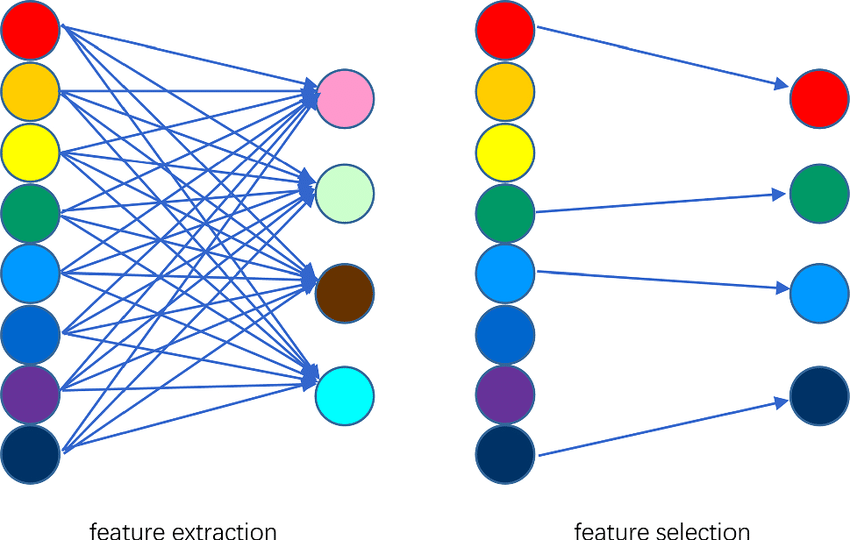

When working with features there is a few things you can do
- Feature Selection
- Feature Extraction: - PCA(principle component analysis)



**PCA steps**
- Taking the whole dataset ignoring the class labels
- Compute the d-dimensional mean vector
- Computing the scatter matrix (alternatively, the covariance matrix)
- Computing eigenvectors and corresponding eigenvalues
- Ranking and choosing k eigenvectors
- Transforming the samples onto the new subspace




**Feature Selection**
- Wrapper methods (forward, backward, and stepwise selection) 
- Filter methods (ANOVA, Pearson correlation, variance thresholding)
- Embedded methods (Lasso, Ridge, Decision Tree).


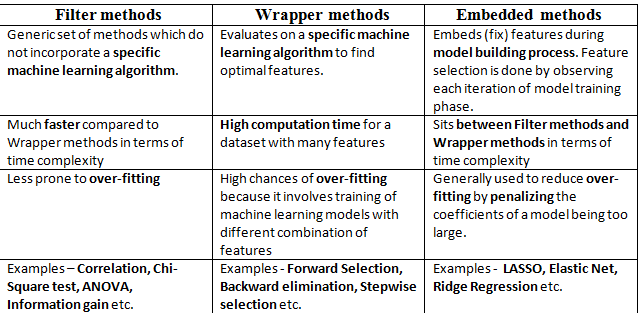


In [77]:
#display PCA names
pcs_names = []
for i, col in enumerate(data_numeric.columns):
    pcs_names.append('PC' + str(i+1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


In [78]:
#normalizing dataset
data_normed = (data_numeric - data_numeric.mean()) / data_numeric.std()
print(data_normed)


        mnplyrs   mxplyrs   mnptime      votes    usrrate      bavg  \
0     -1.643046 -0.156240 -0.097111  12.305490   8.677072  2.830052   
1     -0.029851 -0.156240 -0.097111   8.076498   9.672651  2.724103   
5      1.583344  0.127076  0.479892   2.813077   2.416242  2.441169   
6     -0.029851 -0.439557  0.095223  10.297479  10.221294  2.432347   
7     -0.029851 -0.156240  0.287558   5.338302   5.163753  2.427052   
...         ...       ...       ...        ...        ...       ...   
19942 -0.029851  0.127076 -0.097111  -0.259788  -0.271964 -5.243536   
19968 -0.029851 -0.156240 -0.145194  -0.259788  -0.272537 -5.243536   
19972 -0.029851 -0.439557 -0.193278  -0.259788  -0.269672 -5.243536   
19987  1.583344 -0.297899 -0.145194  -0.259788  -0.273397 -5.243536   
19993 -0.029851 -0.156240 -0.193278  -0.259788  -0.276262 -5.243536   

       complexity  complexity_votes   numwant      views  
0        1.915061          5.315774  9.254086  31.529169  
1        0.717293          3.

In [79]:
#specifying number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=data_normed.shape[1])
pca.fit(data_normed)
data_pca = pd.DataFrame(pca.transform(data_normed),columns = pcs_names)
print(data_pca)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     29.944364 -0.062622 -0.790077  1.328494  2.279896 -1.569170 -8.469328   
1     16.798968 -1.156841 -0.156513  0.688591  0.092748  0.183834 -1.007059   
2      8.227373  0.904118  1.635662 -1.246538 -1.674844 -1.167312 -3.387230   
3     26.445209 -1.833427 -0.305336  2.768667  0.612150 -1.063848 -0.120965   
4     14.582663  0.825118  0.413452 -0.658581 -0.165551 -0.683241 -6.086244   
...         ...       ...       ...       ...       ...       ...       ...   
6426  -1.859661 -1.922164 -0.981275  3.610101  2.067474 -1.771403 -0.937870   
6427  -1.867651 -2.014768 -1.236371  3.747540  1.932501 -1.529811 -1.034478   
6428  -1.843002 -1.776316 -1.383306  3.806147  1.746115 -1.679875 -0.974315   
6429  -1.689578 -1.247343 -0.208930  3.550828  0.456274 -3.682539 -0.745923   
6430  -1.888084 -2.034302 -1.268608  3.726174  1.929853 -1.546709 -1.003282   

            PC8       PC9      PC10  
0     19.2493

In [80]:
#specifying number of components
pca = PCA(n_components=data_normed.shape[1])
pca.fit(data_normed)
data_pca = pd.DataFrame(pca.transform(data_normed),columns = pcs_names)
print(data_pca)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     29.944364 -0.062622 -0.790077  1.328494  2.279896 -1.569170 -8.469328   
1     16.798968 -1.156841 -0.156513  0.688591  0.092748  0.183834 -1.007059   
2      8.227373  0.904118  1.635662 -1.246538 -1.674844 -1.167312 -3.387230   
3     26.445209 -1.833427 -0.305336  2.768667  0.612150 -1.063848 -0.120965   
4     14.582663  0.825118  0.413452 -0.658581 -0.165551 -0.683241 -6.086244   
...         ...       ...       ...       ...       ...       ...       ...   
6426  -1.859661 -1.922164 -0.981275  3.610101  2.067474 -1.771403 -0.937870   
6427  -1.867651 -2.014768 -1.236371  3.747540  1.932501 -1.529811 -1.034478   
6428  -1.843002 -1.776316 -1.383306  3.806147  1.746115 -1.679875 -0.974315   
6429  -1.689578 -1.247343 -0.208930  3.550828  0.456274 -3.682539 -0.745923   
6430  -1.888084 -2.034302 -1.268608  3.726174  1.929853 -1.546709 -1.003282   

            PC8       PC9      PC10  
0     19.2493

[Text(0.5, 0, 'Explained variance'), Text(0, 0.5, 'Principal component')]

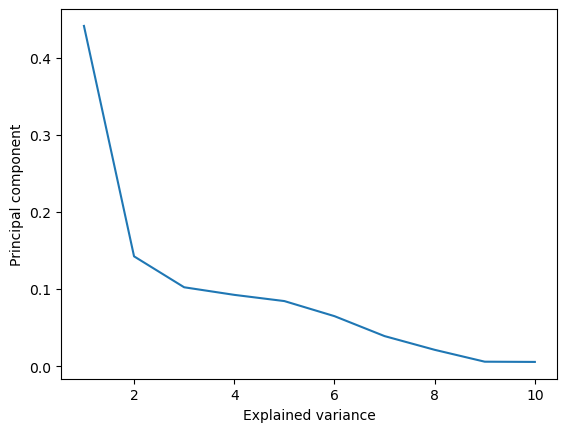

In [81]:
#creating a scree plot
import seaborn as sns
import matplotlib as plt
fig = sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,11))
fig.set(xlabel='Explained variance',ylabel='Principal component')


In [82]:
import numpy as np
#selecting the fewest components
for pc, var in zip(pcs_names,np.cumsum(pca.explained_variance_ratio_)):
   print(pc,var)

PC1 0.44110289588914126
PC2 0.5835746461845162
PC3 0.6859662447341155
PC4 0.7785278991295438
PC5 0.8630261756942509
PC6 0.9279882504147721
PC7 0.967094107762373
PC8 0.9884238086061182
PC9 0.9943595263310957
PC10 1.0


In [83]:
#creating a rotation
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = data_numeric.columns)
print(rotation)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
mnplyrs          -0.034590 -0.489848  0.389400  0.086327 -0.724715 -0.262271   
mxplyrs          -0.011737 -0.386735  0.572648 -0.415297  0.571509 -0.149927   
mnptime           0.000002  0.374125  0.678299  0.503942  0.040816  0.376200   
votes             0.457507 -0.088177 -0.020593  0.114458  0.044751 -0.024467   
usrrate           0.451377 -0.126559 -0.021176  0.124014  0.028954  0.025186   
bavg              0.204590  0.223668  0.144406 -0.685662 -0.363947  0.500615   
complexity        0.106068  0.614251  0.195876 -0.162529 -0.091808 -0.715454   
complexity_votes  0.431861 -0.124425 -0.013129  0.167163  0.027485 -0.014900   
numwant           0.401892  0.061078 -0.006448 -0.106735  0.002919 -0.020326   
views             0.429516 -0.013368 -0.006727  0.041888  0.044821 -0.053404   

                       PC7       PC8       PC9      PC10  
mnplyrs          -0.075100  0.008211  0.007038  0.003679  
m

In [84]:
#creating components
data_reduced = data_pca.iloc[:,0:3]
print(data_reduced)

            PC1       PC2       PC3
0     29.944364 -0.062622 -0.790077
1     16.798968 -1.156841 -0.156513
2      8.227373  0.904118  1.635662
3     26.445209 -1.833427 -0.305336
4     14.582663  0.825118  0.413452
...         ...       ...       ...
6426  -1.859661 -1.922164 -0.981275
6427  -1.867651 -2.014768 -1.236371
6428  -1.843002 -1.776316 -1.383306
6429  -1.689578 -1.247343 -0.208930
6430  -1.888084 -2.034302 -1.268608

[6431 rows x 3 columns]


In [85]:
elbow = [i * 100 for i in list(pca.explained_variance_ratio_)][0:3]
df_elbow = (range(1,4), elbow)
df_elbow 

(range(1, 4), [44.11028958891413, 14.24717502953749, 10.239159854959938])

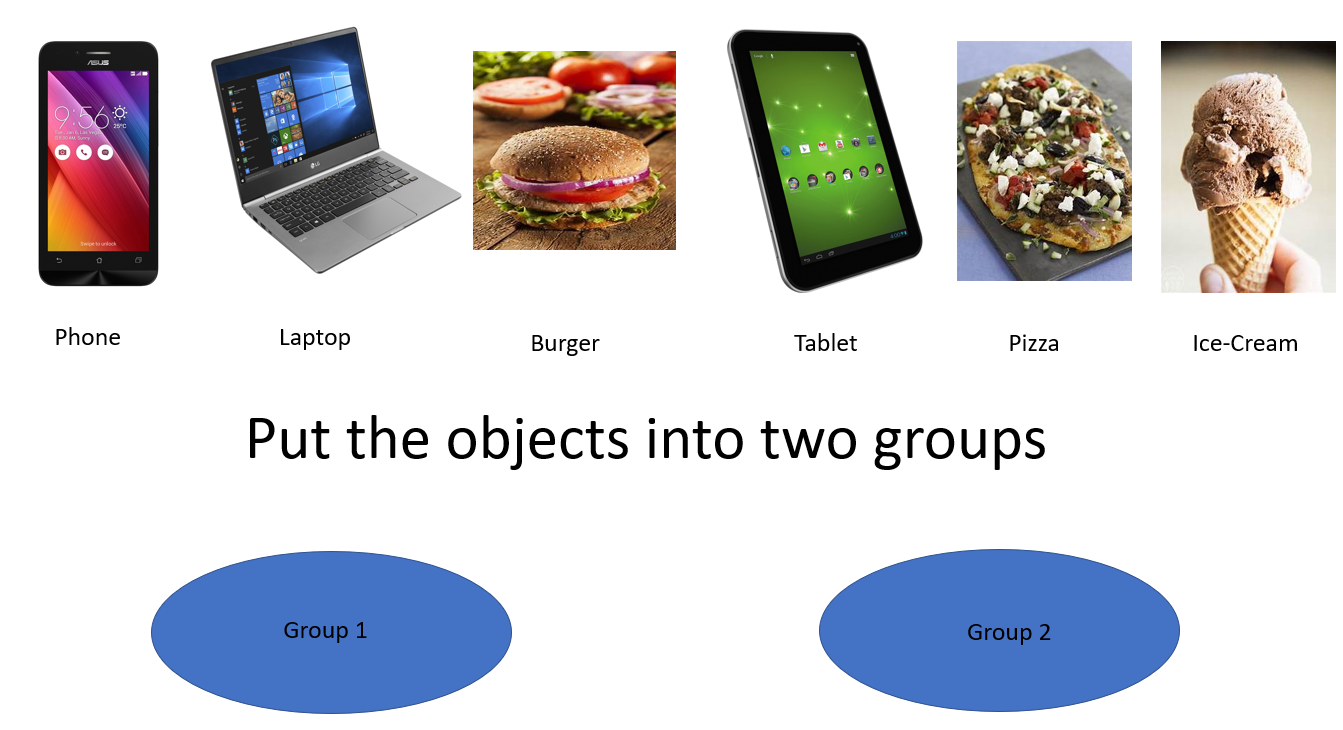

In [86]:
eigen = [i * 100 for i in list(pca.explained_variance_ratio_)][0:7]
df_eigen = (range(1,8), eigen)
df_eigen 

(range(1, 8),
 [44.11028958891413,
  14.24717502953749,
  10.239159854959938,
  9.256165439542833,
  8.449827656470708,
  6.496207472052122,
  3.910585734760093])

In [87]:
tot_elbow = sum(map(sum, df_elbow))
tot_eigen = sum(map(sum, df_eigen))
print('total elbow : ', tot_elbow)
print('total eigen : ', tot_eigen)

total elbow :  74.59662447341155
total eigen :  124.7094107762373


In [88]:
from sklearn.model_selection import train_test_split
X =data_numeric.drop(columns= 'bavg') 
y =data_numeric['bavg']
# test_size: what proportion of original data is used for test set
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=.20, random_state=0)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_X)

# Apply transform to both the training set and the test set.
train_x = scaler.transform(train_X)
test_y = scaler.transform(test_X)

In [90]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [91]:
pca.fit(train_X)

PCA(n_components=0.95)

In [92]:
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [93]:
#import model you want to use
from sklearn.linear_model import LinearRegression

In [94]:
# make an instance of the model
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
# check out solvers in the docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LinearRegression().fit(train_X,train_y)
y_pred = model.predict(test_X)
print(y_pred)

[5.47922575 5.46602786 5.49060717 ... 5.47932719 5.47290869 5.50417075]


## lots of bonus material on working with missing data and advanced PCA techniques and feature selection.

## MISSING DATA


    Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
    Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
    Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.


In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

In [ ]:
print(restaurants['cuisine_type'].unique())

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit = len(restaurants))

# Inspect the first 5 matches
print(matches[0:5])

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1]>=80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = 'italian'

In [ ]:
# Iterate through categories
for cuisine in categories:
    # Create a list of matches, comparing cuisine with the cuisine_type column
    matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

    # Iterate through the list of matches
    for match in matches:
        # Check whether the similarity score is greater than or equal to 80
        if match[1] >= 80:
            # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
            restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine

# Inspect the final result
restaurants['cuisine_type'].unique()

In [ ]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types -
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8)

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)


In [ ]:
## NUll value operations

In [ ]:
try:
  # Print the sum of two None's
  print("Add operation output of 'None': ", None + None)

except TypeError:
  # Print if error
  print("'None' does not support Arithmetic Operations!!")

In [ ]:
try:
  # Print the sum of two np.nan's
  print("Add operation output of 'np.nan': ", np.nan + np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Arithmetic Operations!!")

In [ ]:
try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")

In [ ]:
try:
  # Print the output of logical OR of two np.nan's
  print("OR operation output of 'np.nan': ", np.nan or np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Logical Operations!!")

In [ ]:
try:
  # Print the comparison of two 'None's
  print("'None' comparison output: ", None == None)

except TypeError:
  # Print if error
  print("'None' does not support this operation!!")

In [ ]:
try:
  # Print the comparison of two 'np.nan's
  print("'np.nan' comparison output: ", np.nan == np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support this operation!!")

In [ ]:
try:
  # Check if 'None' is 'NaN'
  print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

In [ ]:
try:
  # Check if 'np.nan' is 'NaN'
  print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

In [ ]:
# Read the dataset 'college.csv'
college = pd.read_csv('college.csv')
print(college.head())

# Print the info of college
print(college.info())

# Store unique values of 'csat' column to 'csat_unique'
csat_unique = college.csat.unique()

In [ ]:
# Read the dataset 'college.csv'
college = pd.read_csv('college.csv')
print(college.head())

# Print the info of college
print(college.info())

# Store unique values of 'csat' column to 'csat_unique'
csat_unique = college.csat.unique()

# Print the sorted values of csat_unique
print(np.sort(csat_unique))

In [ ]:
# Read the dataset 'college.csv' with na_values set to '.'
college = pd.read_csv('college.csv', na_values='.')
print(college.head())

# Print the info of college
print(college.info())

In [ ]:
# Print the description of the data
print(diabetes.describe())

# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.BMI[diabetes.BMI == 0]
print(zero_bmi)

# Set the 0 values of column 'BMI' to np.nan
diabetes.BMI[diabetes.BMI == 0] = np.nan

In [ ]:
# Print the description of the data
print(diabetes.describe())

# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.BMI[diabetes.BMI == 0]
print(zero_bmi)

# Set the 0 values of column 'BMI' to np.nan
diabetes.BMI[diabetes.BMI == 0] = np.nan

# Print the 'NaN' values in the column BMI
print(diabetes.BMI[np.isnan(diabetes.BMI)])

In [ ]:
## Analyze Missing Values

In [ ]:
# Load the airquality dataset
airquality = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')

# Create a nullity DataFrame airquality_nullity
airquality_nullity = airquality.isnull()
print(airquality_nullity.head())

# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

In [ ]:
# Import missingno as msno
import missingno as msno

# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_frequency.png")

In [ ]:
# Import missingno as msno
import missingno as msno

# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976': 'Jul-1976'], freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sliced.png")

In [ ]:
# Import missingno
import missingno as msno

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Show plot
plt.show()

In [ ]:
# Import missingno
import missingno as msno

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

Analyzing the missingness of a variable against another variable helps you determine any relationships between missing and non-missing values. This is very similar to how you found correlations of missingness between two columns in the previous exercises.

In this exercise, you're going to write a function which fills in dummy values in the DataFrame and in the next exercise you are going to plot a scatter plot to analyze if there is any correlation of missingness against another column. The operations involve shifting and scaling the column range with a scaling factor.

The function rand() has been imported for you from numpy.random.

In [ ]:
def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

In [ ]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes['Skin_Fold'].isnull()+diabetes['BMI'].isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()

In [ ]:
# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

# Visualize the missingness of diabetes after dropping missing values
msno.matrix(diabetes)

display("/usr/local/share/datasets/glucose_dropped.png")

In [ ]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)

In [ ]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [ ]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

In [ ]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull()+diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

In [ ]:
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using backward fill
airquality.fillna(method='bfill', inplace=True)

# Print after imputing missing values
print(airquality[30:40])

In [ ]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=True)

# Print after interpolation
print(airquality[30:40])

Data visualizaion of imputed values

In [ ]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

In [ ]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

In [ ]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(3, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

## Fancy Impute

In [ ]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

In [ ]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

## Imputing categorical values

In [ ]:
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Ordinally encode reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of ambience in users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

In [ ]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [ ]:
# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in users
for col_name in users:
    
    # Reshape the data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [ ]:
## Compare imputes to remove bias

In [ ]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)

# Print the params of lm
print('\nCoefficcients:\n', lm.params)

In [ ]:
r_squares = {'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             'MICE Imputation': lm_MICE.rsquared_adj}

# Select best R-squared
best_imputation = max(r_squares, key=r_squares.get)

print("The best imputation technique is: ", best_imputation)

In [ ]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_mean_imputed['Skin_Fold'].plot(kind='kde')
diabetes_knn_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mice_imputed['Skin_Fold'].plot(kind='kde')

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'KNN Imputation', 'MICE Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Skin Fold')

plt.show()

In [ ]:
#PCA

In [ ]:
# ask how many features
dataset.info()

#### Feature selection vs Feature Extraction

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
# Show the plot
plt.show()

In [ ]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')
# Show the plot
plt.show()

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')
plt.show()

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')
# Show the plot
plt.show()

In [ ]:
#### t-SNE visualization of high-dimensional data

In [ ]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

In [ ]:
#### Test Train Split

In [ ]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

In [ ]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

In [ ]:
# Accuracy after reduction
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

#### Features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

In [ ]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

#### Pairwise correlation

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [ ]:
#### Remove highly correlated features

In [ ]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

#### Selecting features for model performance

In [ ]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

In [ ]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

In [ ]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

In [ ]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

In [ ]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc))

#### Tree Based feature selection
#### random forest

In [ ]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the test set accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc)) 

In [ ]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

In [ ]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

In [ ]:
#### Regularized linear regression

In [ ]:
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

In [ ]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

In [ ]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

In [ ]:
#### combining feature selectors  lassocv

In [ ]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

In [ ]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

### PCA principle Componant Analysis

Daily XP
2155
Exercise
Exercise
Manual feature extraction I

You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [ ]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

In [ ]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

In [ ]:
### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

In [ ]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

In [ ]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

In [ ]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

In [ ]:
#remove dimensions with no variance
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

In [ ]:
#### choosing number of components
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()